In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
len(X_train)

60000

In [11]:
X_train[0].shape

(28, 28)

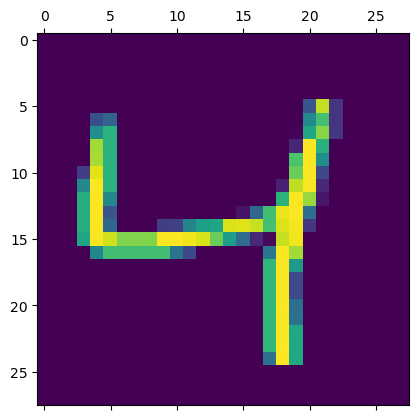

In [15]:
plt.matshow(X_train[2])

In [16]:
y_train[2]

4

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
#now we will flatten the X_train to a single dimensional array with 28*28 = 784 elements
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [27]:
X_test_flattened.shape

(10000, 784)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8148 - loss: 0.7141
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9155 - loss: 0.3034
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9273 - loss: 0.2617


In [34]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.3057


[0.26886019110679626, 0.9240999817848206]

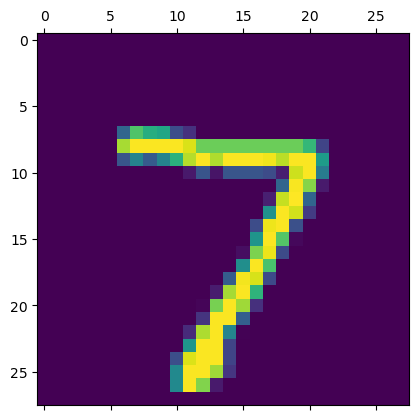

In [38]:
plt.matshow(X_test[0])

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.40579639e-02, 4.72740766e-07, 7.00285360e-02, 9.55182612e-01,
       2.37800367e-03, 1.14831813e-01, 1.26430598e-06, 9.99790072e-01,
       1.09202154e-01, 7.21765041e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[0])

7

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    6,    2,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    8,  935,   13,    7,    5,   11,   10,   31,    5],
       [   4,    0,   23,  911,    0,   34,    2,   10,   17,    9],
       [   2,    1,   10,    1,  898,    0,    8,    4,    9,   49],
       [   9,    3,    7,   19,    8,  801,    9,    4,   25,    7],
       [  15,    3,   11,    1,    7,   21,  896,    2,    2,    0],
       [   1,    5,   22,    9,    5,    1,    0,  940,    3,   42],
       [  10,    8,    7,   20,    9,   39,    9,    9,  853,   10],
       [  11,    7,    1,   10,   24,    7,    0,   18,    5,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

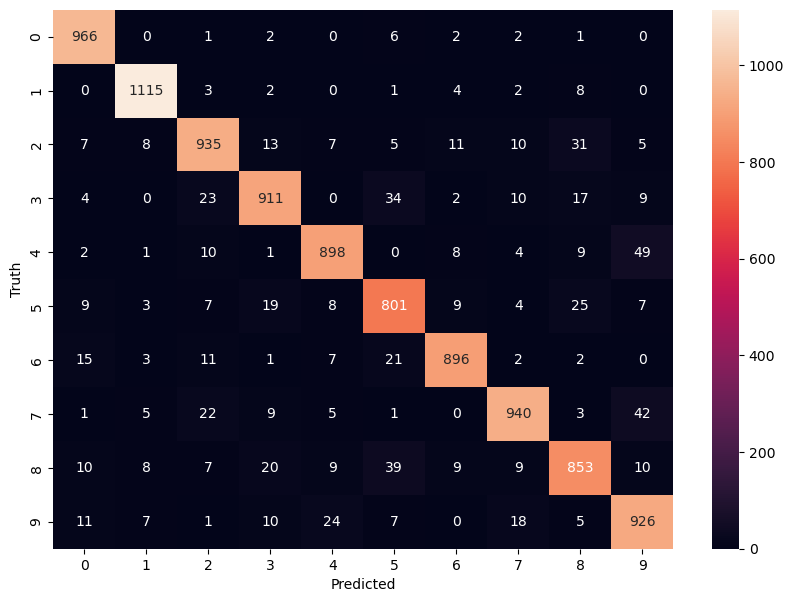

In [46]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
#hidden layer

model_with_layer = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_with_layer.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_with_layer.fit(X_train_flattened, y_train, epochs=5)
model.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8786 - loss: 0.4537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - loss: 0.1336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9723 - loss: 0.0924
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0512
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.0984


[0.0838618129491806, 0.9736999869346619]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

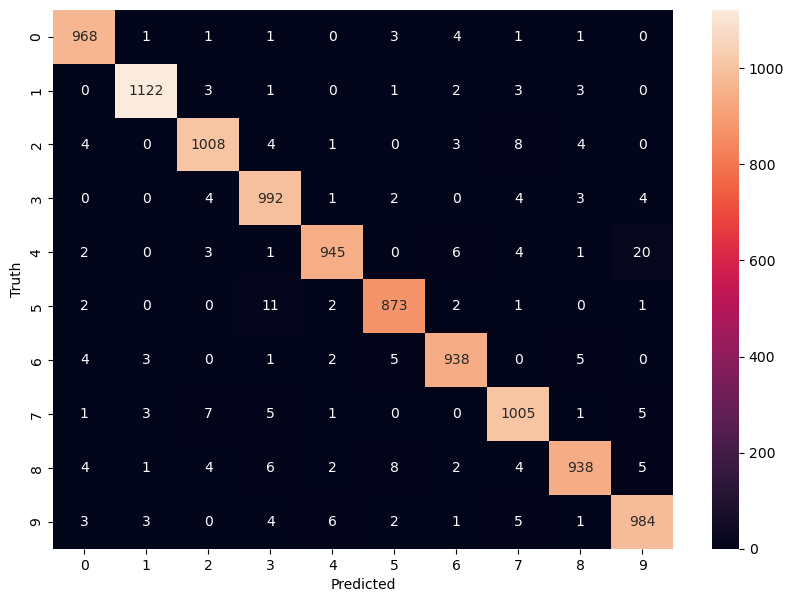

In [52]:
y_predicted = model_with_layer.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
#hidden layer nad flattening the X_train via keras library

model_with_flatten = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model_with_flatten.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_with_flatten.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8736 - loss: 0.4516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9622 - loss: 0.1280
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9802 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0500


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None